In [1]:
# we can preload the wind speed data, otherwise, the tool will do it every time
import xarray as xr
filepath_wind_speed = "/Users/romain/GitHub/windwhisper/dev/fixtures/era5_mean_2013-2022_month_by_hour.nc"
filepath_correction = "/Users/romain/GitHub/windwhisper/dev/fixtures/ratio_gwa2_era5.nc"
def wind_speed_data():
    wind_speed = xr.open_dataset(filepath_wind_speed).to_array().mean(dim="month")
    correction = xr.open_dataset(filepath_correction).to_array()
    correction = correction.sel(variable='ratio_gwa2_era5_mean_WS').interp(latitude=wind_speed.latitude, longitude=wind_speed.longitude, method="linear")
    return wind_speed * correction

In [3]:
data = wind_speed_data()

In [5]:
from windwhisper import windturbines
wind_turbines = {'Turbine 0': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.74840260435069, 9.206243110596287),
               'power': 15000.0},
 'Turbine 1': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.74670223984771, 9.140099380853458),
               'power': 15000.0},
 'Turbine 2': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.734249600379336, 9.206526921380098),
               'power': 15000.0},
 'Turbine 3': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.74864349108282, 9.091328259545296),
               'power': 15000.0},
 'Turbine 4': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.7467007615353, 9.170468399818262),
               'power': 15000.0}}

listening_points = {
    "Listener 1": {"position": (47.3769, 8.5517)},
    "Listener 2": {"position": (47.3869, 8.552)},
    "Listener 3": {"position": (47.3461, 8.5175)},
}

wt = windturbines.WindTurbines(
    wind_turbines=wind_turbines,
    wind_speed_data=data,
    listeners=listening_points,
)

Number of observations in whole set: 417
Number of observations in test set: 84
Mean Squared Error (MSE): [3.54009395 1.58610436 2.63667868 1.31971812 1.13070737 1.01669676
 0.97606736 0.98560415 0.9459048  0.96934517]
Root Mean Squared Error (RMSE): [1.88151374 1.25940635 1.62378529 1.14878985 1.06334725 1.00831382
 0.98796121 0.99277598 0.97257637 0.98455328]
Trained model saved to /Users/romain/Github/windwhisper/windwhisper/data/default_model.skops


In [7]:
# this is the noise mapping, for the average wind speed 
# each turbine is exposed to at these locations
# the resolution is currently 100 x 100
# but can be changed by changing the NOISE_MAP_RESOLUTION constant value in noisemap.py
wt.noise_map.noise_level_at_mean_wind_speed

<xarray.DataArray (lat: 100, lon: 100, wind_speed: 1)> Size: 80kB
array([[[-5.68009703],
        [-5.67978144],
        [-5.67946973],
        ...,
        [-5.66766006],
        [-5.66772367],
        [-5.6677912 ]],

       [[-5.59087174],
        [-5.59055015],
        [-5.59023252],
        ...,
        [-5.5781981 ],
        [-5.57826292],
        [-5.57833173]],

       [[-5.50072273],
        [-5.50039496],
        [-5.50007122],
        ...,
...
        ...,
        [33.87611277],
        [33.4475295 ],
        [33.03132411]],

       [[20.43871965],
        [20.54663246],
        [20.65590844],
        ...,
        [34.44872034],
        [33.96572374],
        [33.50217656]],

       [[20.11649764],
        [20.21629957],
        [20.31716595],
        ...,
        [29.50431791],
        [29.3446769 ],
        [29.18076489]]])
Coordinates:
  * lat         (lat) float64 800B 47.24 47.33 47.42 47.5 ... 55.69 55.78 55.87
  * lon         (lon) float64 800B 8.414 8.423 8.432 8.441 ... 9.308 9.317 9.327
    wind_speed  int64 8B 1

Text(0, 0.5, 'Latitude')

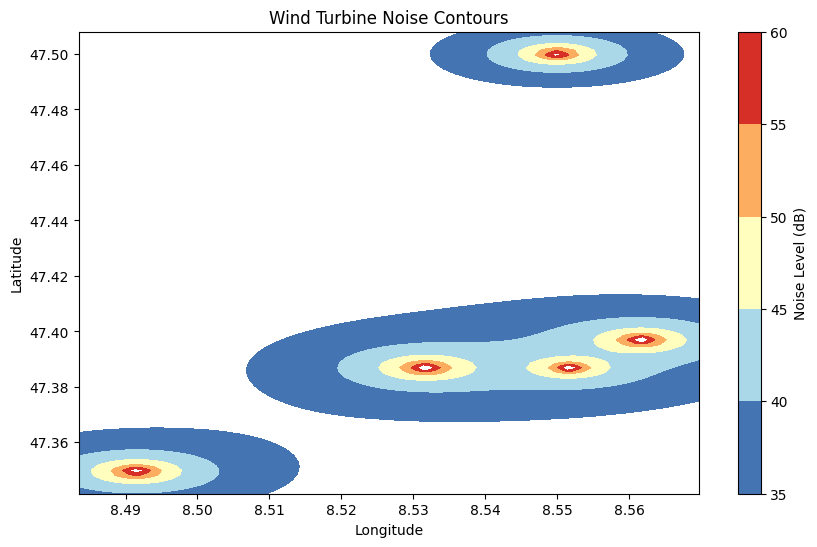

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Define contour levels starting from 35 dB
contour_levels = [35, 40, 45, 50, 55, 60]

# add bounding box
plt.xlim(wt.noise_map.LON.min(), wt.noise_map.LON.max())
plt.ylim(wt.noise_map.LAT.min(), wt.noise_map.LAT.max())

plt.contourf(
    wt.noise_map.LON,  # x-axis, longitude
    wt.noise_map.LAT,  # y-axis, latitude
    wt.noise_map.noise_level_at_mean_wind_speed.sum(dim="wind_speed"),
    levels=contour_levels,
    cmap="RdYlBu_r",
)

plt.colorbar(label="Noise Level (dB)")
plt.title("Wind Turbine Noise Contours")
plt.xlabel("Longitude")  # Correct label for x-axis
plt.ylabel("Latitude")  # Correct label for y-axis